In [3]:
import numpy as np
import pandas as pd
import random
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
iris = datasets.load_iris()

In [4]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)
X = iris_scaled
y = [1 if target == 0 else 0 for target in iris.target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [5]:
# print(y)
X1 = [x[0] for x in X]
X2 = [x[1] for x in X]

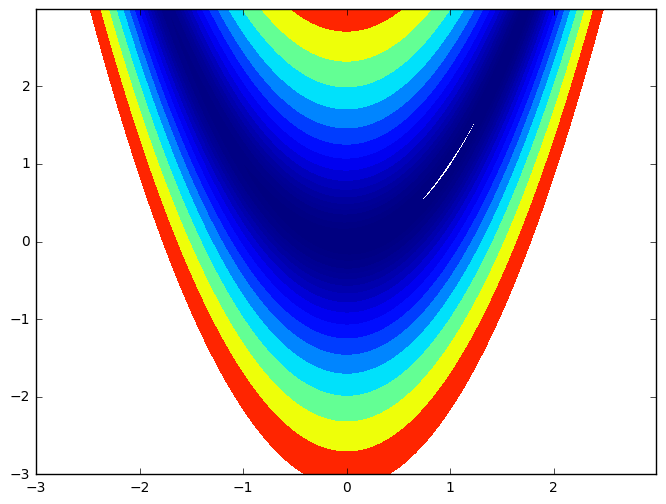

In [24]:
%matplotlib inline
x = np.arange(-3, 3, 0.01)
y = np.arange(-3, 3, 0.01)
x, y = np.meshgrid(x, y)
z = 100 * (y - x ** 2) ** 2 + (1 - x) ** 2
plt.figure(figsize = (8, 6))
plt.contourf(x, y, z, np.logspace(-1, 3, 31))

plt.show()

<function matplotlib.pyplot.show>

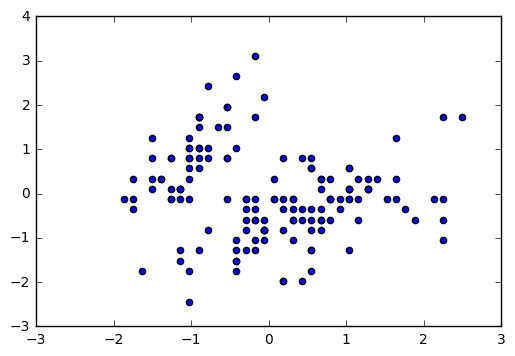

In [25]:
plt.scatter(X1, X2)
plt.show

In [26]:
class simulated_annealing(object):
    
    def __init__(self, temperature, delta, freezing_point):
        self.temperature = temperature
        self.delta = delta
        self.freezing_point = freezing_point
        self.X = np.random.uniform(low=-2.78, high=2.78, size=2)
        
    def dist_func(self, X):
        return 100 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2
    
    def random_delta(self):
        return (np.random.random_sample(2) - 0.5) / 100
    
    def prob(self, delf):
        return np.exp(-delf / self.temperature)
    
    def inrange(self, a, b, c):
        if(a >= b and a <= c):
            return True
        return False
        
    def update_x(self):
        while(self.temperature > self.freezing_point):
            minX = self.X
            probableX = self.X
            for n in range(10):
                delx = self.random_delta()
                newx = probableX + delx
                oldval = self.dist_func(probableX)
                newval = self.dist_func(newx)
                if newval < oldval and self.inrange(newx[0], -2.78, 2.78) and self.inrange(newx[1], -2.78, 2.78):
                    minX = newx
                    probableX = newx
                elif(self.prob(newval - oldval) >= 0.6):
                    probableX = newx
            self.X = minX
            self.temperature -= self.delta
    

In [27]:
obj = simulated_annealing(100, 0.01, 0.01)
obj.update_x()
print(obj.X)
print(obj.dist_func(obj.X))

[ 1.34079039  1.79822171]
0.116163376883


In [138]:
np.random.random_sample(2)

array([ 0.37643906,  0.36458534])